# Data Viz

In [1]:
## ------------------------Installing libraries------------------------------------------------
# Install from CRAN
#install.packages("tidyverse")
#install.packages("lubridate")

In [2]:
##______________________________ LOADING LIBRARIES________________________
library(readr)
library(tidyverse)
library(lubridate)
library(ggplot2)

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v purrr     1.0.1
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
# Functions

## This function reads csv data files
read_data <- function(filename, delim_f, skip_f) {
    
    ## Read data file
    data <- read_delim(filename, delim=delim_f, skip=skip_f,
                   col_names=c("datetime","O3","NO2","SO2","CO","PM10","TEMP","PREC","RAD"), show_col_types = FALSE)
    # show_col_types = TRUE shows the column types to explicit what each column contains

    return(data)
}

In [22]:
## Specify settings
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [23]:
## ------------------LOADING DATA------------------------------------------------------
## Define input file (located in same directory)
BASEL <- "./Data/BAS(1).csv"
file.exists(BASEL)

DAVOS <- "./Data/DAV.csv"
file.exists(DAVOS)

[1] TRUE

[1] TRUE

In [50]:
##____________________READING DATA_____________
#DAVOS_data <- read_data(DAVOS, ";", 6)
DAVOS_data <- read_delim(DAVOS, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","PM10","NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# BASEL_data <- read_data(BASEL, ";", 6)
## Read data file
BASEL_data <- read_delim(BASEL, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","SO2","PM10","PM2.5","EC", "CPC", "NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# show_col_types = TRUE shows the column types to explicit what each column contains


In [51]:
## ------------------------------------------------------------------------
## View information stored in object
cat("Davos dataset:\n")
str(DAVOS_data)

cat("\nBasel dataset:\n")
str(BASEL_data)

Davos dataset:
spc_tbl_ [8,784 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ datetime: chr [1:8784] "01.01.2024 01:00" "01.01.2024 02:00" "01.01.2024 03:00" "01.01.2024 04:00" ...
 $ O3      : num [1:8784] 57.7 55.2 49.9 52.1 65.8 67.1 64 58.4 61.8 59 ...
 $ NO2     : num [1:8784] 1.9 2.1 3.7 4.5 0.7 0.7 3.4 5.4 1.7 2.9 ...
 $ PM10    : num [1:8784] 1.2 1.5 2.2 3 0.2 0.4 0.3 0.3 0.3 0.4 ...
 $ NOx     : num [1:8784] 1.9 2.1 3.7 4.6 0.7 0.7 3.5 5.4 1.8 3.4 ...
 $ TEMP    : num [1:8784] -2.2 -2.8 -3.3 -4.2 -5.2 -5.6 -5.7 -5.9 -5.7 -5.3 ...
 $ PREC    : num [1:8784] 0 0 0 0 0 0 0 0 0 0 ...
 $ RAD     : num [1:8784] -0.6 -0.7 -0.7 -1.1 -1.3 -0.8 -0.6 -0.6 22.6 73.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   datetime = col_character(),
  ..   O3 = col_double(),
  ..   NO2 = col_double(),
  ..   PM10 = col_double(),
  ..   NOx = col_double(),
  ..   TEMP = col_double(),
  ..   PREC = col_double(),
  ..   RAD = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 

Basel dataset:
spc_tbl

In [52]:
## ------------------------------------------------------------------------
## View first 6 lines
cat("DAVOS:\n")
head(DAVOS_data)
cat("\nBASEL:\n")
head(BASEL_data)

DAVOS:


datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6
01.01.2024 02:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7
01.01.2024 03:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7
01.01.2024 04:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1
01.01.2024 05:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3
01.01.2024 06:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8



BASEL:


datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0
01.01.2024 02:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0
01.01.2024 03:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0
01.01.2024 04:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0
01.01.2024 05:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2
01.01.2024 06:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0


In [53]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column 
## TO DO only once
DAVOS_data$datetime <- parse_date_time(DAVOS_data$datetime, "%d.%m.%Y %H:%M", tz = "Europe/Paris")

Warning message:
" 1 failed to parse."


In [54]:
#checking table rows 
invalid_rows <- which(is.na(DAVOS_data$datetime))
invalid_rows
invalid_dates <- DAVOS_data[is.na(DAVOS_data$datetime), ]
invalid_dates

[1] 2162

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,68.5,0.6,0.2,0.7,0.3,1.3,0


In [55]:
## uncomment th eline below to coorect ptential errors
DAVOS_data[invalid_rows, "datetime"] <- as.POSIXct("2024-03-31 02:00:00")

In [56]:
# Extract the month
DAVOS_data[["month"]] <- month(DAVOS_data[["datetime"]])

# Extract the date (without time)
DAVOS_data[["date"]] <- date(DAVOS_data[["datetime"]])

# Check the results
head(DAVOS_data)

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6,1,2024-01-01
2024-01-01 02:00:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7,1,2024-01-01
2024-01-01 03:00:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7,1,2024-01-01
2024-01-01 04:00:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1,1,2024-01-01
2024-01-01 05:00:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3,1,2024-01-01
2024-01-01 06:00:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8,1,2024-01-01


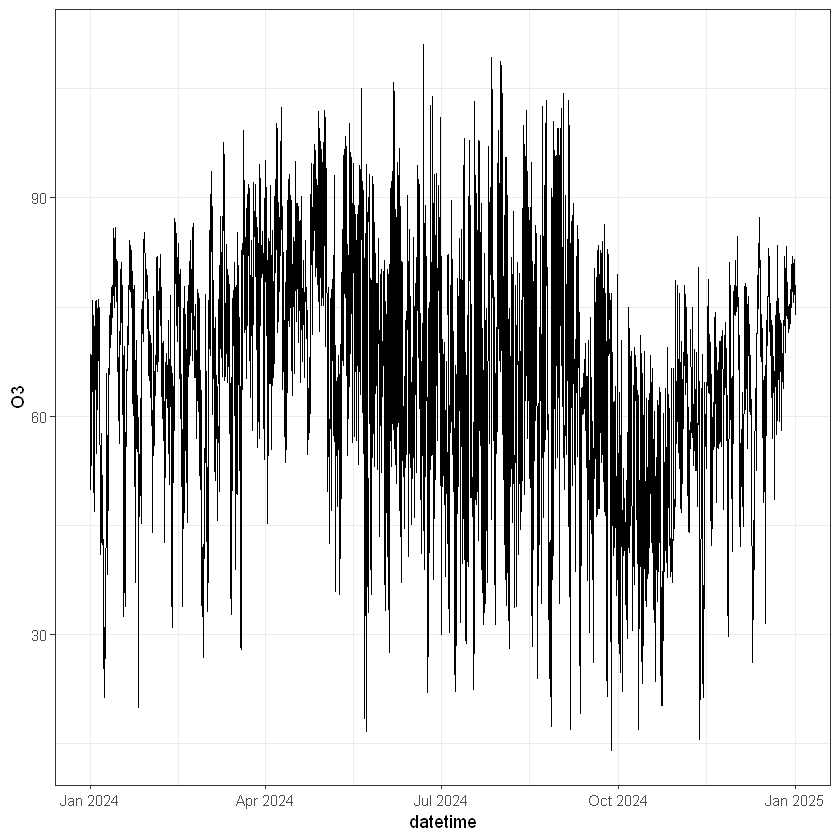

In [30]:
## ---- fig.width=8, fig.height=5------------------------------------------
ggplot(DAVOS_data)+
  geom_line(aes(datetime, O3))

In [29]:
class(DAVOS_data$datetime)

[1] "POSIXct" "POSIXt"

In [59]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column
BASEL_data$datetime <- parse_date_time(BASEL_data$datetime, "%d.%m.%Y %H:%M", tz = "Europe/Paris")

Warning message:
" 1 failed to parse."


datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0,1,2024-01-01
2024-01-01 02:00:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0,1,2024-01-01
2024-01-01 03:00:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0,1,2024-01-01
2024-01-01 04:00:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0,1,2024-01-01
2024-01-01 05:00:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2,1,2024-01-01
2024-01-01 06:00:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0,1,2024-01-01


In [60]:
#checking table rows 
invalid_rows <- which(is.na(BASEL_data$datetime))
invalid_rows
invalid_dates <- BASEL_data[is.na(BASEL_data$datetime), ]
invalid_dates

[1] 2162

datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
NA,44.9,15.4,0.6,17.4,11.8,0.4,9307.1,15.7,8.3,0,0,NA,NA


In [61]:
## uncomment th eline below to coorect ptential errors
BASEL_data[invalid_rows, "datetime"] <- as.POSIXct("2024-03-31 02:00:00")

In [62]:
# Extract the month
BASEL_data[["month"]] <- month(BASEL_data[["datetime"]])

# Extract the date (without time)
BASEL_data[["date"]] <- date(BASEL_data[["datetime"]])

# Check the results
head(BASEL_data)

datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0,1,2024-01-01
2024-01-01 02:00:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0,1,2024-01-01
2024-01-01 03:00:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0,1,2024-01-01
2024-01-01 04:00:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0,1,2024-01-01
2024-01-01 05:00:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2,1,2024-01-01
2024-01-01 06:00:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0,1,2024-01-01


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


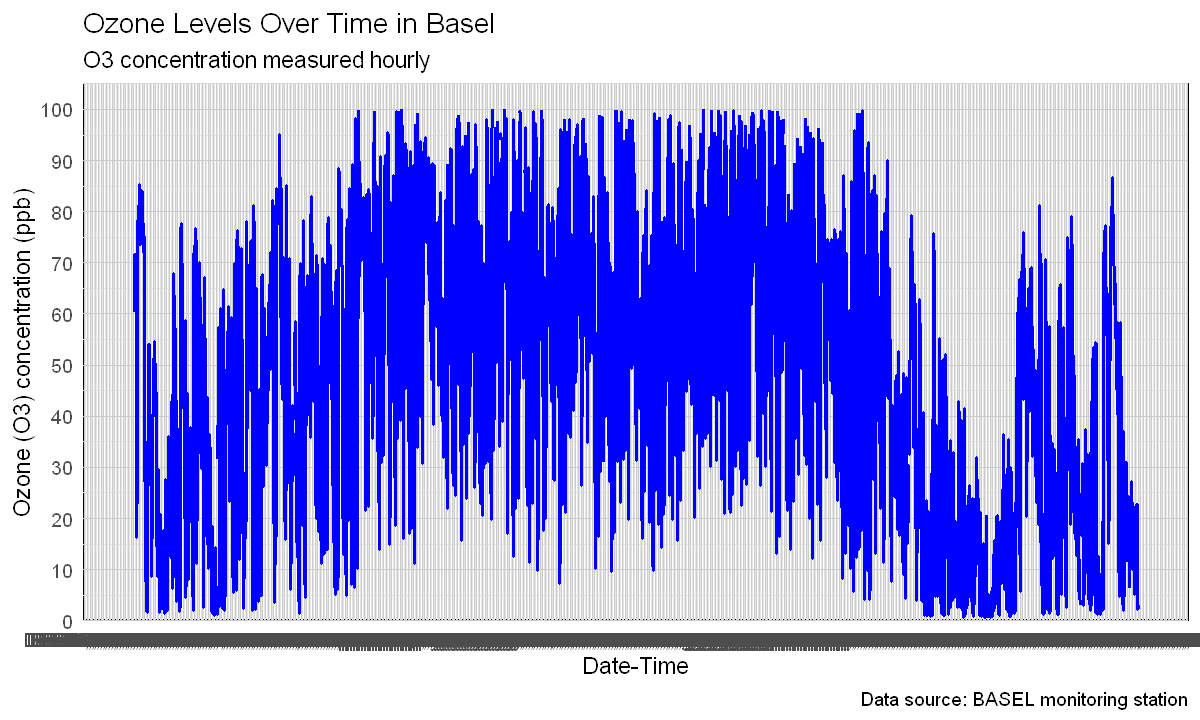

In [67]:
# Load necessary libraries
library(ggplot2)

# Adjust plot dimensions (useful in RStudio or Jupyter-like environments)
options(repr.plot.width = 10, repr.plot.height = 6)

# Create the plot with all parameters adjustable
plot <- ggplot(BASEL_data) +
  geom_line(aes(x = datetime, y = O3), 
            color = "blue",         # Line color
            size = 1,               # Line thickness
            linetype = "solid") +   # Line type (solid, dashed, dotted, etc.)

  # Customize titles and labels
  labs(
    title = "Ozone Levels Over Time in Basel",         # Main title
    subtitle = "O3 concentration measured hourly",     # Subtitle
    caption = "Data source: BASEL monitoring station", # Caption
    x = "Date-Time",                                   # X-axis label
    y = "Ozone (O3) concentration (ppb)"               # Y-axis label
  ) +

  # Adjust axis scales and breaks
  scale_x_datetime(
    date_labels = "%b %d, %H:%M",    # Format date labels
    date_breaks = "1 day"            # Set time intervals
  ) +
  scale_y_continuous(
    limits = c(0, 100),              # Set Y-axis range
    breaks = seq(0, 100, by = 10),   # Y-axis breaks
    expand = expansion(mult = c(0, 0.05)) # Avoid empty space at plot edges
  ) +

  # Customize axis text, ticks, and fonts
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12, color = "gray20"),
    axis.text.y = element_text(size = 12, color = "gray20"),
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold")
  ) +

  # Add gridlines and panel background
  theme_minimal(base_size = 14) +    # Base font size
  theme(
    panel.grid.major = element_line(color = "gray80", size = 0.5),
    panel.grid.minor = element_line(color = "gray90", size = 0.3),
    panel.background = element_rect(fill = "white"),
    plot.background = element_rect(fill = "white", color = NA)
  ) +

  # Adjust legend (if you add more aesthetics later)
  theme(
    legend.position = "right",               # Legend position: "top", "bottom", "left", "right"
    legend.title = element_text(size = 12), # Legend title size
    legend.text = element_text(size = 10)   # Legend text size
  )

# Print the plot
print(plot)

# Save the plot to a file
ggsave("ozone_plot_basel.png", plot = plot, width = 10, height = 6, dpi = 300)


In [90]:
## Print to pdf file.
pdf("outputs/fig1.pdf")
print(ggp)
dev.off()


Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


png 
  2